In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

In [3]:
us_2016_primary_results = pd.read_csv('./data/us-2016-primary-results.csv', sep=';')

In [4]:
us_2016_primary_results.head(3)

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Vermont,VT,Sutton,95000197.0,Republican,John Kasich,20,0.227
1,Vermont,VT,Tunbridge,95000204.0,Republican,John Kasich,36,0.319
2,Vermont,VT,Weathersfield,95000220.0,Republican,Ted Cruz,46,0.111


We first analyze the columns of the dataset, and drop any unnecessary columns, such as fips (Federal Information Processing Standards, which are numeric codes for identifying states and counties), and state_abbreviation, as they are redundant

In [5]:
us_2016_primary_results.drop(columns=['state_abbreviation', 'fips'], inplace=True)

We now check for missing values in the dataset

In [6]:
us_2016_primary_results.isnull().sum()

state             0
county            0
party             0
candidate         0
votes             0
fraction_votes    0
dtype: int64

In [7]:
us_2016_primary_results.describe()

,votes,fraction_votes
count,24611.000000,24611.000000
mean,2306.252773,0.304524
std,9861.183572,0.231401
min,0.000000,0.000000
25%,68.000000,0.094000
50%,358.000000,0.273000
75%,1375.000000,0.479000
max,590502.000000,1.000000


We may notice a very high maximum vote count in comparison to the 25%~75% IQR values. This is most likely due to the fact that in the US elections, there are often heavily favoured candidates, and their respective party, which often prevails the majority of votes. Such dominance is apparent in numerous states and counties, and it is also the probable cause of the seemingly high standard deviation and mean compared to the IQR values.

This phenomena is renown, with the terms 'Red States' and 'Blue States' commonly characterizing regions of the United States politically. These observations of dominant candidates and parties, divided by geographic locations are often critical in assessing, and predicting the outcomes of an election.

Let us now continue with this intuition, by analyzing the candidates, parties, and their associated vote counts.

In [8]:
print(us_2016_primary_results.candidate.unique())

['John Kasich' 'Ted Cruz' 'Ben Carson' 'Donald Trump' 'Marco Rubio'
 'Hillary Clinton' 'Bernie Sanders' "Martin O'Malley" 'Uncommitted'
 'Carly Fiorina' 'Chris Christie' 'Mike Huckabee' 'Rick Santorum'
 'Jeb Bush' 'Rand Paul' 'No Preference']


In [9]:
candidate_votes = us_2016_primary_results.groupby(["candidate"]).sum()
print(candidate_votes)

                    votes  fraction_votes
candidate                                
Ben Carson         564553       98.373066
Bernie Sanders   11959102     2074.393879
Carly Fiorina       15191        2.408571
Chris Christie      24353        1.937211
Donald Trump     13302541     1671.854969
Hillary Clinton  15692452     1939.776121
Jeb Bush            94411        6.901265
John Kasich       4159949      440.609220
Marco Rubio       3321076      375.479603
Martin O'Malley       752        0.822000
Mike Huckabee        3345        2.395000
No Preference        8152        2.276000
Rand Paul            8479        3.372000
Rick Santorum        1782        0.986000
Ted Cruz          7603006      873.022095
Uncommitted            43        0.045000


At first glance, Donald Trump, Bernie Sanders, Hillary Clinton are intuitively the dominant candidates, with Ben Carson, John Kasich, Marco Rubio, and Ted Cruz possessing "meaningful" influence in the number of votes of the presidential election.

Let us take these candidates, in the above order, and visualize the votes they acquired by state.

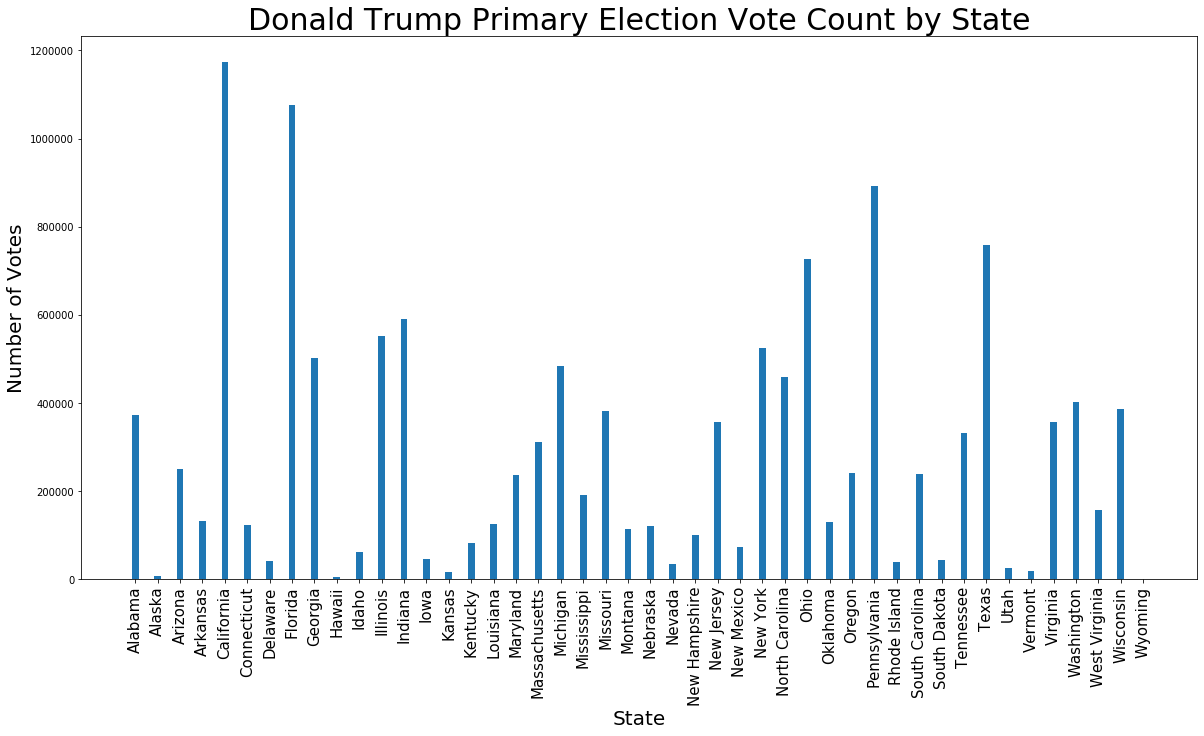

In [10]:
# Isolate votes acquired by Donald Trump by state
donald_trump_county = us_2016_primary_results.loc[us_2016_primary_results.candidate.isin(['Donald Trump'])]
donald_trump_state = donald_trump_county.groupby(['state', 'candidate'])['votes'].sum()
donald_trump = donald_trump_state.reset_index()

# Plot information
pyplot.figure(figsize=(20,10))
pyplot.bar(donald_trump['state'], donald_trump['votes'], width=0.3)
pyplot.xlabel('State', fontsize = 20)
pyplot.ylabel('Number of Votes', fontsize = 20)
pyplot.xticks(rotation = 90, fontsize = 15)
pyplot.title('Donald Trump Primary Election Vote Count by State', fontsize = 30)
pyplot.show()

We may notice very high vote counts from states: California, Florida, Pennsylvania, Texas, and Ohio, and very low vote counts from states: Alaska, Hawaii, Kansas, and Vermont. However, these vote counts may be skewed by population size of each state. In this respect, we should also observe the ratio, as opposed to pure count.

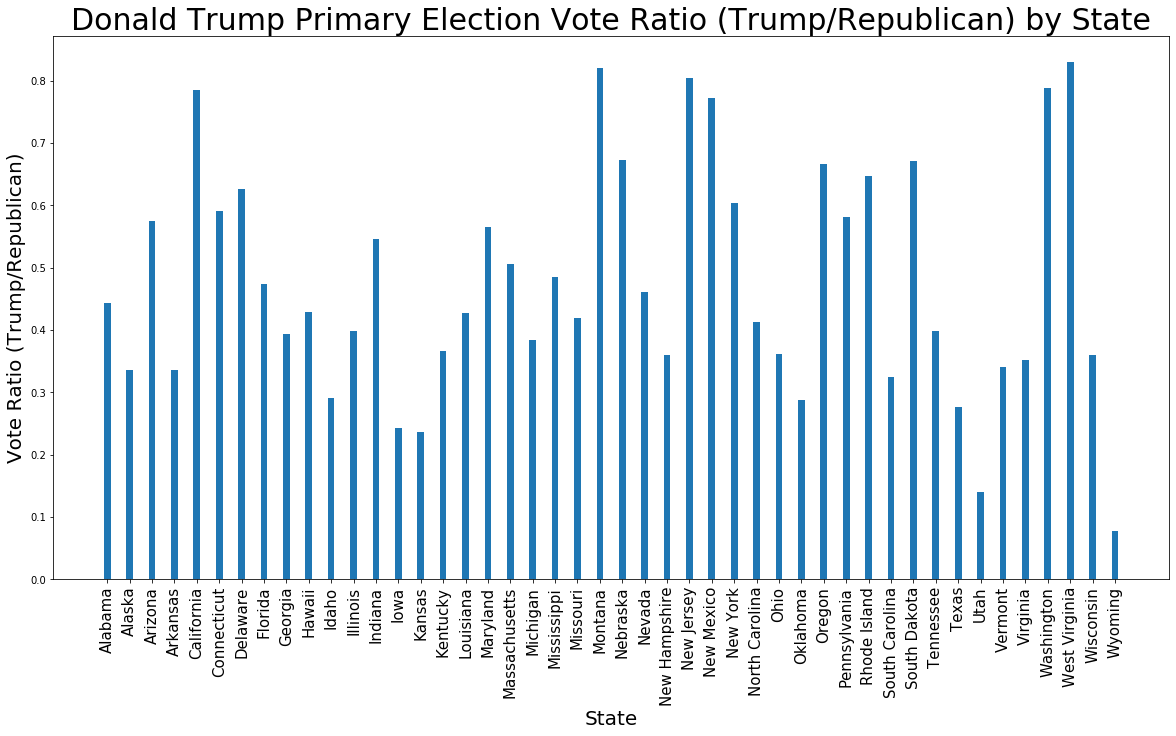

In [11]:
# Get total votes by state and party
state_votes = us_2016_primary_results.groupby(['state', 'party'])['votes'].sum()
state_votes = state_votes.reset_index()

# Retrieve total Republican votes by state
republican_votes = state_votes['party'] == 'Republican'
state_republican_votes = state_votes[republican_votes].drop('party', 1)
state_republican_votes = state_republican_votes.reset_index(drop = True)

# Calculate ratio (votes acquired by Donald Trump)/(votes acquired by Republican party) by state
donald_trump_ratio = pd.DataFrame.copy(donald_trump)
donald_trump_ratio['votes'] = donald_trump_ratio['votes'].div(state_republican_votes['votes'].values, axis=0)

# Plot information
pyplot.figure(figsize=(20,10))
pyplot.bar(donald_trump_ratio['state'], donald_trump_ratio['votes'], width=0.3)
pyplot.xlabel('State', fontsize = 20)
pyplot.ylabel('Vote Ratio (Trump/Republican)', fontsize = 20)
pyplot.xticks(rotation = 90, fontsize = 15)
pyplot.title('Donald Trump Primary Election Vote Ratio (Trump/Republican) by State', fontsize = 30)
pyplot.show()


In [12]:
# Get 5 States with the largest vote ratios for Donald Trump, and sort accordingly
largest_ratio = donald_trump_ratio['votes'].nlargest(5)
states_largest_ratio = donald_trump_ratio['votes'].isin(largest_ratio.values)
largest_ratio_donald_trump = donald_trump_ratio[states_largest_ratio]
largest_ratio_donald_trump = largest_ratio_donald_trump.sort_values(by=['votes'], ascending = False)
print('Maximum Ratios: \n', largest_ratio_donald_trump, '\n')

# Get 5 States with the smallest vote ratios for Donald Trump, and sort accordingly
smallest_ratio = donald_trump_ratio['votes'].nsmallest(5)
states_smallest_ratio = donald_trump_ratio['votes'].isin(smallest_ratio.values)
smallest_ratio_donald_trump = donald_trump_ratio[states_smallest_ratio]
smallest_ratio_donald_trump = smallest_ratio_donald_trump.sort_values(by=['votes'])
print('Minimum Ratios \n', smallest_ratio_donald_trump, '\n')

Maximum Ratios: 
             state     candidate     votes
43  West Virginia  Donald Trump  0.830481
22        Montana  Donald Trump  0.819639
26     New Jersey  Donald Trump  0.803871
42     Washington  Donald Trump  0.788886
4      California  Donald Trump  0.785537 

Minimum Ratios 
       state     candidate     votes
45  Wyoming  Donald Trump  0.077519
39     Utah  Donald Trump  0.140313
14   Kansas  Donald Trump  0.236142
13     Iowa  Donald Trump  0.243241
38    Texas  Donald Trump  0.276781 



We notice the plot is a lot more uniform than the previous. 
Trump has the highest support ratio within the Republican party from states: West Virginia, Montana, New Jersey, Washington, California, and the lowest support ratio from states: Wyoming, Utah, Kansas, Iowa, and Texas.

Let us compare similar results with candidate Hillary Clinton.

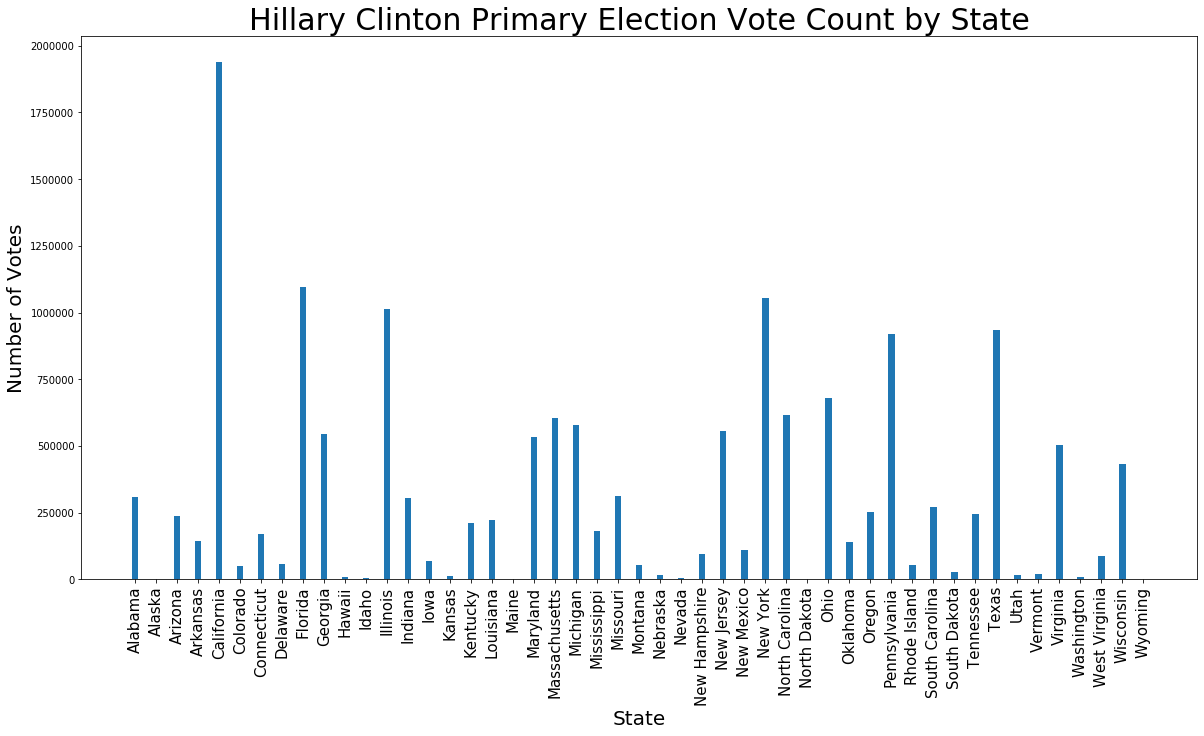

In [13]:
# Isolate votes acquired by Hillary Clinton by state
hillary_county = us_2016_primary_results.loc[us_2016_primary_results.candidate.isin(['Hillary Clinton'])]
hillary_state = hillary_county.groupby(['state', 'candidate'])['votes'].sum()
hillary = hillary_state.reset_index()

# Plot information
pyplot.figure(figsize=(20,10))
pyplot.bar(hillary['state'], hillary['votes'], width=0.3)
pyplot.xlabel('State', fontsize = 20)
pyplot.ylabel('Number of Votes', fontsize = 20)
pyplot.xticks(rotation = 90, fontsize = 15)
pyplot.title('Hillary Clinton Primary Election Vote Count by State', fontsize = 30)
pyplot.show()

We may notice similar trends as Donald Trump's vote count by state, but with a much higher peak at California, the common maximum vote count state for both candidates. We may also observe Washington, where Hillary Clinton has very low vote counts, as opposed to Donald Trump, who acquired more than 400000 votes. Similarly, in Indiana, Donald Trump earned nearly 600000 votes, while Hillary Clinton acquired a little more than 250000.

Let us proceed by calculating the ratio instead, as with Donald Trump.

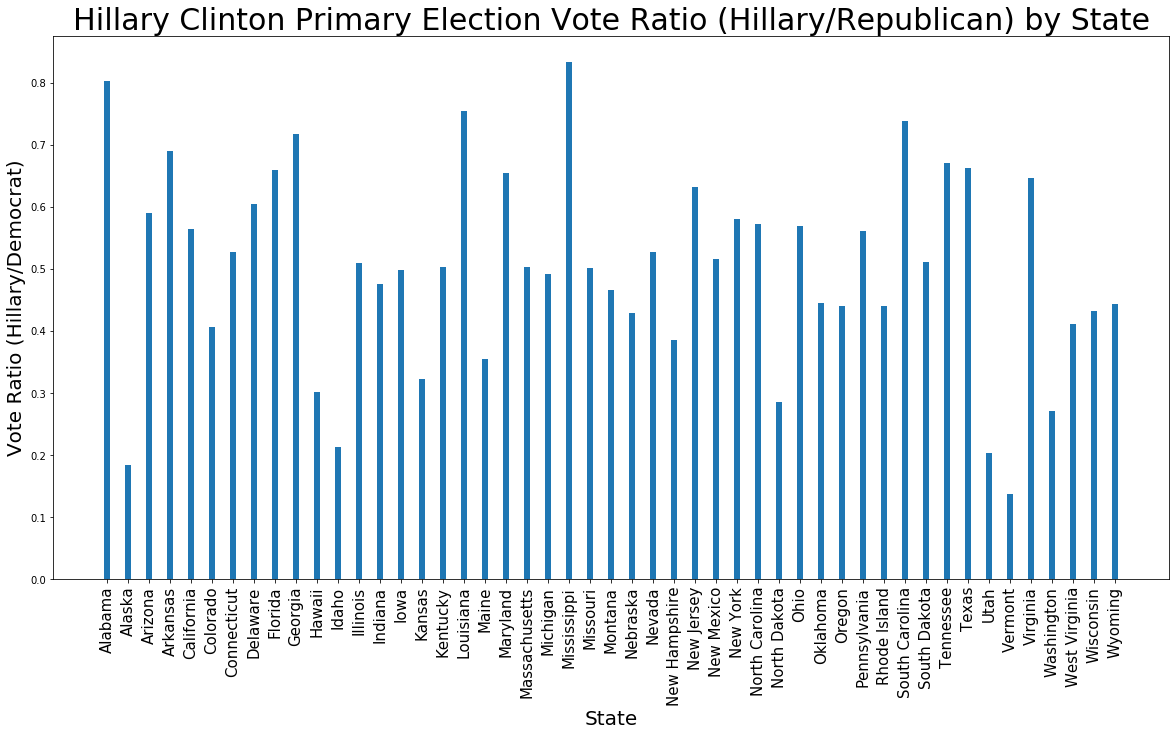

In [14]:
# Get total votes have already been calculated

# Retrieve total Democrat votes by state
democrat_votes = state_votes['party'] == 'Democrat'
state_democrat_votes = state_votes[democrat_votes].drop('party', 1)
state_democrat_votes = state_democrat_votes.reset_index(drop = True)

# Calculate ratio (votes acquired by Donald Trump)/(votes acquired by Republican party) by state
hillary_ratio = pd.DataFrame.copy(hillary)
hillary_ratio['votes'] = hillary_ratio['votes'].div(state_democrat_votes['votes'].values, axis=0)

# Plot information
pyplot.figure(figsize=(20,10))
pyplot.bar(hillary_ratio['state'], hillary_ratio['votes'], width=0.3)
pyplot.xlabel('State', fontsize = 20)
pyplot.ylabel('Vote Ratio (Hillary/Democrat)', fontsize = 20)
pyplot.xticks(rotation = 90, fontsize = 15)
pyplot.title('Hillary Clinton Primary Election Vote Ratio (Hillary/Republican) by State', fontsize = 30)
pyplot.show()

Unlike the vote count, which is most likely influenced by the population size for each state, the ratio seems a lot less alike for the two candidates, Hillary Clinton and Donald Trump. Nearly all states have meaningful difference in ratios between the two individuals, such as Alabama: ~80% for Clinton, ~45% for Trump, West Virginia: ~45% for Hillary, ~80% for Trump, Louisiana: ~75% for Hillary, ~40% for Trump.

One interesting observation is in California. It is the state with the highest number of votes for both candidates, where Hillary received 2000000 votes, and Trump acquired 1200000. In contrast to these results, the vote ratio for Hillary is about 60%, while Trump's vote ratio is nearly 80%. With such differences in the actual vote count, we realize that Trump actually received a higher degree of support from his party and voters compared to Hillary.

Also, there seems to be a pattern, where, if one member thrives in a given state, the other member seems to underperform. Although this is a very interesting phenomena, further observations and analysis would be required to correctly conclude their correlation/independence.

In [15]:
# Get 5 States with the largest vote ratios for Hillary Clinton, and sort accordingly
largest_ratio = hillary_ratio['votes'].nlargest(5)
states_largest_ratio = hillary_ratio['votes'].isin(largest_ratio.values)
largest_ratio_hillary = hillary_ratio[states_largest_ratio]
largest_ratio_hillary = largest_ratio_hillary.sort_values(by=['votes'], ascending = False)
print('Maximum Ratios: \n', largest_ratio_hillary, '\n')

# Get 5 States with the smallest vote ratios for Hillary Clinton, and sort accordingly
smallest_ratio = hillary_ratio['votes'].nsmallest(5)
states_smallest_ratio = hillary_ratio['votes'].isin(smallest_ratio.values)
smallest_ratio_hillary = hillary_ratio[states_smallest_ratio]
smallest_ratio_hillary = smallest_ratio_hillary.sort_values(by=['votes'])
print('Minimum Ratios \n', smallest_ratio_hillary, '\n')

Maximum Ratios: 
              state        candidate     votes
22     Mississippi  Hillary Clinton  0.833872
0          Alabama  Hillary Clinton  0.802243
17       Louisiana  Hillary Clinton  0.754164
38  South Carolina  Hillary Clinton  0.738832
9          Georgia  Hillary Clinton  0.716994 

Minimum Ratios 
          state        candidate     votes
43     Vermont  Hillary Clinton  0.136626
1       Alaska  Hillary Clinton  0.183673
42        Utah  Hillary Clinton  0.203457
11       Idaho  Hillary Clinton  0.213668
45  Washington  Hillary Clinton  0.271493 



Clinton has the highest vote ratios from states: Mississippi, Alabama, Louisiana, South Carolina, and Georgia, and lowest vote ratios from states: Vermont, Alaska, Utah, Idaho, and Washington.

All top five maximum and minimum ratios differ between Clinton and Trump, other than Utah, which is a common state with minimum ratios for both members. We may indefinitely suspect the population size, or it being the hometown of another candidate as the cause for this occurrence.

We may continue a more in-depth analysis for all members. However, let us observe comparisons of votes between the two major parties: Democrat and Republican. Although data regarding the primary results do not necessarily reflect that of the actual presidential election, it would still be interesting to assess its patterns and outcomes, as it may still reveal characteristics and tendencies of the regions, parties, and candidates.

In [16]:
party_votes = us_2016_primary_results.groupby(["party"]).sum()
print(party_votes)

               votes  fraction_votes
party                               
Democrat    27660501        4017.313
Republican  29098686        3477.339


It is interesting to notice the relatively uniform distributions between the two parties. One party does not seem to significatly outweigh the other in vote count for the primaries election.

(Note: This does not necessarily suggest any definitive information about the outcome of the presidential elections, as the primary results are held indirectly, and separately by each party. It simply determines the number of delegates each party's national convention will receive from their respective state, which eventually decides the party's presendential nominee altogether. However, an individual voting for the primary elections must indicate which political party ballot they wish to vote in, and only select members within the chosen party, so it is the first evidence that we may reasonably utilize to determine information about each party.)

With Hillary Clinton and Bernie Sanders belonging in the Democrat party, and Donald Trump in the Republican party, one may suggest the favour of the Democrats. However, with Ben Carson, John Kasich, Marco Rubio, and Ted Cruz all belonging in the Republican party (they hold meaningful amount of votes, as mentioned above), it can be proposed that voters favouring the Republican party have a wider variety of candidates that have a recognizeable number of supporters, spread out in the apparent analysis. (One or two candidates do not seem to completely prevail the number of votes in the Republican party, unlike the Democrats)

In [17]:
# We may utilize pd.set_option('display.max_rows', None) to expand the output, to visualize the full list of calculations.
# pd.reset_option('display.max_rows') may be used to reset the above command.

# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

state_votes = us_2016_primary_results.groupby(['state', 'party']).agg({'votes': "count"})
print(state_votes)

                          votes
state         party            
Alabama       Democrat      134
              Republican    335
Alaska        Democrat       80
              Republican    200
Arizona       Democrat       30
...                         ...
West Virginia Republican    165
Wisconsin     Democrat      144
              Republican    216
Wyoming       Democrat       46
              Republican     48

[95 rows x 1 columns]


Roughly, we may notice the trend of the Republicans possessing a higher number of votes over the Democrats in most states. For further assessment, we would like to see the favouring party, and their ratio of votes acquired in detail.

In [18]:
pre_state_votes = state_votes.reset_index()
current_state = ''
i = 0

# temp = [[state_1, party_favoured_1, vote_ratio_in_favour_1], [state_2, ...], ...]
temp = []
while (i < len(pre_state_votes['state']) - 1):
    current_state = pre_state_votes['state'][i]
    # Check if there are more than one party voted for in the assessing state
    if current_state == pre_state_votes['state'][i+1]:
        # Calculate the ratio of votes the favouring party acquired in the assessing state
        vote_diff = pre_state_votes['votes'][i] - pre_state_votes['votes'][i+1]
        vote_total = pre_state_votes['votes'][i] + pre_state_votes['votes'][i+1]
        '''
        vote_ratio = abs(round((vote_diff/vote_total*100),2))
        '''
        # Identify the dominant party
        if vote_diff < 0:
            party_favoured = 'Republican'
            vote_ratio = abs(round((pre_state_votes['votes'][i+1]/vote_total*100),2))
        elif vote_diff == 0:
            party_favoured ='Even votes'
            vote_ratio = 50
        else:
            party_favoured = 'Democrat'
            vote_ratio = abs(round((pre_state_votes['votes'][i]/vote_total*100),2))
        i += 2
    else:
        vote_ratio = 100
        party_favoured = pre_state_votes['party'][i]
        i += 1
    temp.append([current_state, party_favoured, vote_ratio])
# Convert calculated information into dataframe for presentation, and easier access
state_favour = pd.DataFrame(temp, columns = ['state', 'party', 'vote ratio'])
print(state_favour.head(10))

         state       party  vote ratio
0      Alabama  Republican       71.43
1       Alaska  Republican       71.43
2      Arizona  Republican       60.00
3     Arkansas  Republican       71.43
4   California  Republican       60.00
5     Colorado    Democrat      100.00
6  Connecticut  Republican       60.00
7     Delaware  Republican       60.00
8      Florida  Republican       66.67
9      Georgia  Republican       71.43


There are only three states: North Dakota, Maine, and Colorado that voted for the Democrats more than the Republicans. It is interesting to observe the fact that they have a 100 to 0 ratio of votes in favour for the Democrats over the Republicans. We may suspect the fact that this data may have some deficiencies, such as missing data, and may not completely be representative of the actual primary results.